In [1]:
import os
import sys
import glob
import dlib

In [2]:
faces_folder = "../data/faces/"

In [2]:
options = dlib.simple_object_detector_training_options()

In [3]:
options.add_left_right_image_flips = True

In [4]:
options.C = 5

In [5]:
options.num_threads = 2
options.be_verbose = True

In [7]:
training_xml_path = os.path.join(faces_folder, "training.xml")
testing_xml_path = os.path.join(faces_folder, "testing.xml")

In [8]:
dlib.train_simple_object_detector(training_xml_path, "detector.svm", options)

In [9]:
print("Training accuracy: {}".format(dlib.test_simple_object_detector(training_xml_path, "detector.svm")))

Training accuracy: precision: 1, recall: 1, average precision: 1


In [10]:
print("Testing accuracy: {}".format(dlib.test_simple_object_detector(testing_xml_path, "detector.svm")))

Training accuracy: precision: 1, recall: 1, average precision: 1


In [11]:
detector = dlib.simple_object_detector("detector.svm")

In [12]:
win_det = dlib.image_window()
win_det.set_image(detector)

In [13]:
import matplotlib.pyplot as plt

TypeError: Image data cannot be converted to float

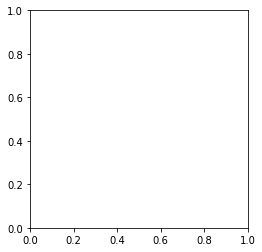

In [15]:
# plt.imshow(detector)

In [17]:
import cv2

In [19]:
win = dlib.image_window()
for f in glob.glob(os.path.join(faces_folder, "*.jpg")):
    print("Processing file: {}".format(f))
    img = cv2.imread(f)
    dets = detector(img)
    print("Number of faces detected: {}".format(len(dets)))
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(k, d.left(), d.top(), d.right(), d.bottom()))
    
    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()
    

Processing file: ../data/faces/dogs.jpg
Number of faces detected: 0
Processing file: ../data/faces/2008_004176.jpg
Number of faces detected: 7
Detection 0: Left: 161 Top: 118 Right: 197 Bottom: 154
Detection 1: Left: 109 Top: 82 Right: 145 Bottom: 118
Detection 2: Left: 221 Top: 94 Right: 257 Bottom: 130
Detection 3: Left: 189 Top: 78 Right: 225 Bottom: 114
Detection 4: Left: 205 Top: 230 Right: 241 Bottom: 266
Detection 5: Left: 325 Top: 78 Right: 361 Bottom: 114
Detection 6: Left: 281 Top: 98 Right: 317 Bottom: 134
Processing file: ../data/faces/2007_007763.jpg
Number of faces detected: 7
Detection 0: Left: 177 Top: 214 Right: 213 Bottom: 250
Detection 1: Left: 193 Top: 90 Right: 229 Bottom: 126
Detection 2: Left: 157 Top: 114 Right: 193 Bottom: 150
Detection 3: Left: 309 Top: 233 Right: 352 Bottom: 276
Detection 4: Left: 93 Top: 198 Right: 129 Bottom: 234
Detection 5: Left: 293 Top: 86 Right: 329 Bottom: 122
Detection 6: Left: 381 Top: 89 Right: 424 Bottom: 132
Processing file: ../d

In [20]:
faces_folder + "/2"

'../data/faces/'

In [22]:
images = [cv2.imread(faces_folder + "2008_002506.jpg"),
         cv2.imread(faces_folder + "2009_004587.jpg")]

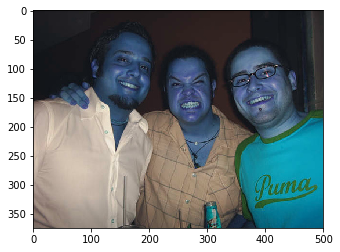

In [23]:
plt.imshow(images[0])

In [24]:
boxes_img1 = ([dlib.rectangle(left=329, top=78, right=437, bottom=186),
               dlib.rectangle(left=224, top=95, right=314, bottom=185),
               dlib.rectangle(left=125, top=65, right=214, bottom=155)])
boxes_img2 = ([dlib.rectangle(left=154, top=46, right=228, bottom=121),
               dlib.rectangle(left=266, top=280, right=328, bottom=342)])

In [35]:
boxes = [boxes_img1, boxes_img2]

In [36]:
img = cv2.imread("../data/faces/girl.jpg")

In [37]:
detected = detector(img)

In [38]:
detected

rectangles[[(295, -75) (849, 542)], [(847, 134) (1168, 455)]]

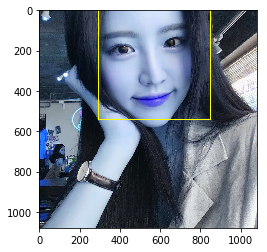

In [40]:
for i, d in enumerate(detected):
    x1, y1, x2, y2, w, h = d.left(), d.top(), d.right(), d.bottom(), d.width(), d.height()
    
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 0), 2)
    
plt.imshow(img)

In [41]:
detector2 = dlib.train_simple_object_detector(images, boxes, options)

In [42]:
win_det.set_image(detector2)
dlib.hit_enter_to_continue()

In [43]:
print("\nTraining accuracy: {}".format(
    dlib.test_simple_object_detector(images, boxes, detector2)))


Training accuracy: precision: 1, recall: 1, average precision: 1


## Hand detected

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
hand = cv2.imread("../data/hands/11.jpg")
plt.imshow(hand)

In [ ]:
hand = cv2.imread("../data/faces/2008_001009.jpg")
plt.imshow(hand)

In [6]:
dlib.train_simple_object_detector("../data/hands/training_hand.xml", "../data/hands/detector.svm", options)

In [7]:
detector = dlib.simple_object_detector("../data/hands/detector.svm")

In [64]:
hand = cv2.imread("../data/hands/9.jpg")

In [65]:
detected = detector(hand)

In [67]:

detected

rectangles[[(95, 26) (370, 370)]]

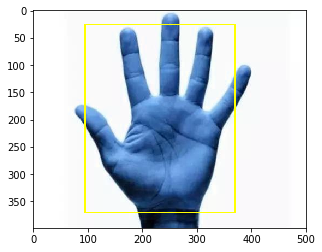

In [68]:
for i, d in enumerate(detected):
    x1, y1, x2, y2, w, h = d.left(), d.top(), d.right(), d.bottom(), d.width(), d.height()
    
    cv2.rectangle(hand, (x1, y1), (x2, y2), (255, 255, 0), 2)
    
plt.imshow(hand)

## Test detect hand in real time

In [8]:
from imutils.video import WebcamVideoStream
import cv2
import dlib

In [9]:
video_capture = WebcamVideoStream(src=0).start()
while True:
    frame = video_capture.read()
    
#     frame_rgb = frame[:, :, ::-1]
    
    detected = detector(frame, )
    
    for i, d in enumerate(detected):
        x1, y1, x2, y2, w, h = d.left(), d.top(), d.right(), d.bottom(), d.width(), d.height()

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 255, 0), 2)
    
# plt.imshow(img)
    
    cv2.imshow("Video", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

KeyboardInterrupt: 

## Process a picture

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy
import dlib

In [6]:
name_image = "/home/damvantai/Documents/datasets/hand_dataset/hand_dataset/training_dataset/training_data/images/Buffy_1.jpg"
image = cv2.imread(name_image)

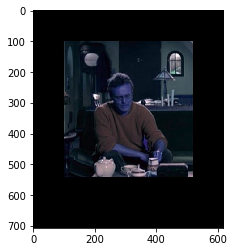

In [7]:
plt.imshow(image)